In [1]:
import numpy as np
import pandas as pd
import math
import time
import pickle
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
from webcolors import hex_to_rgb
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go 

In [2]:
# For Notebooks
init_notebook_mode(connected=True) 

# Figure 1 panel b

In [4]:
volcano_df = pickle.load(open('./figuredata/SE_uncondition_2019_volcano.pk','rb'))
volcano_df.head(10)

,SE,name,2019_A,2019_B,2020_A,2020_B,2019_ROR,2019_Delta,p_value,sig,p_corrected
1,10000029,5-alpha-reductase deficiency,0,220920,1,211151,inf,inf,0.488696,False,1.0
2,10000044,abdomen crushing,0,220920,1,211151,inf,inf,0.488696,False,1.0
3,10000050,abdominal adhesions,15,220905,12,211140,0.836999,-0.200000,0.703079,False,1.0
4,10000059,abdominal discomfort,2145,218775,1993,209159,0.971854,-0.070862,0.364840,False,1.0
5,10000060,abdominal distension,920,220000,935,210217,1.063601,0.016304,0.192441,False,1.0
6,10000077,abdominal mass,25,220895,14,211138,0.585878,-0.440000,0.111617,False,1.0
7,10000081,abdominal pain,1848,219072,1755,209397,0.993554,-0.050325,0.853964,False,1.0
8,10000084,abdominal pain lower,238,220682,262,210890,1.151954,0.100840,0.117306,False,1.0
9,10000087,abdominal pain upper,1810,219110,1794,209358,1.037329,-0.008840,0.276807,False,1.0
10,10000090,abdominal rigidity,12,220908,15,211137,1.307848,0.250000,0.565418,False,1.0


In [5]:
volcano_df.shape

(10008, 11)

In [6]:
volcano_df['logp'] = -np.log10(volcano_df['p_corrected'])
volcano_df['logROR'] = np.log(volcano_df['2019_ROR'])

/home/xiangzhang/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/home/xiangzhang/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [7]:
drop_list_name = ['suspected covid-19', 'sickle cell anaemia with crisis', 'dialysis', 'death', 'retinal vasculitis', 'anaphylactic reaction', 'anaesthetic complication', 'viral mutation identified', 'blood creatinine increased', 'alanine aminotransferase increased', 'covid-19', 'cerebral vasoconstriction', 'immune-mediated adverse reaction', 'lymphopenia', 'acute generalised exanthematous pustulosis', 'transaminases increased', 'transcription medication error', 'foreign body in urogenital tract', 'pustule', 'neutrophil count decreased', 'immune-mediated enterocolitis', 'near death experience', 'restless legs syndrome', 'alcoholism', 'clinical trial participant', 'aspartate aminotransferase increased', 'apgar score low', 'uveitis', 'anhedonia', 'anterior chamber cell', 'magnetic resonance imaging abnormal', 'deafness neurosensory', 'anterior chamber inflammation', 'retinal artery occlusion', 'blood alkaline phosphatase increased', 'bezoar', 'periorbital swelling', 'virologic failure', 'anterior chamber flare', 'therapy interrupted', 'liver function test increased', 'product temperature excursion issue', 'ageusia', 'diverticulum', 'tachypnoea', 'haematocrit decreased', 'prostatic specific antigen increased', 'disability', 'apparent death', 'cystic fibrosis respiratory infection suppression', 'pain', 'encephalopathy', 'covid-19 pneumonia', 'dependence', 'foreign body in throat', 'collagen disorder', 'tuberculin test positive', 'hypoalbuminaemia', 'therapy cessation', 'lung opacity', 'vitritis', 'attention deficit hyperactivity disorder', 'acquired gene mutation', 'hypermutation', 'keratic precipitates', 'panic reaction', 'drug delivery system issue', 'transfusion', 'sars-cov-2 test negative', 'eye inflammation', 'sars-cov-2 test positive', 'drug effect less than expected', 'white blood cell count decreased', 'magnetic resonance imaging brain abnormal', 'eye pain', 'bone contusion', 'photosensitivity reaction', 'blood count abnormal', 'hospice care', 'subarachnoid haematoma', 'talipes', 'weight decreased', 'cystic fibrosis', 'manufacturing product shipping issue', 'lymphocyte count decreased', 'lower limb fracture', 'monoclonal immunoglobulin increased', 'coronavirus test positive', 'diverticulum intestinal', 'coeliac disease', 'hypercapnia', 'deformity', 'sprue-like enteropathy', 'shock', 'bone marrow failure', 'dry eye', 'neoplasm malignant', 'nocturnal dyspnoea', 'coronavirus infection', 'oxygen saturation decreased', 'choroidal effusion', 'catheter management', 'hypoparathyroidism', 'haemoglobin decreased', 'sensitivity to weather change']

In [8]:
id_keep = [i not in drop_list_name for i in volcano_df.name]
volcano_df =volcano_df[id_keep]
# print('updated volcano shape: {}'.format(len(volcano_df)))
volcano_df.sort_values('logp').tail(10)

,SE,name,2019_A,2019_B,2020_A,2020_B,2019_ROR,2019_Delta,p_value,sig,p_corrected,logp,logROR
2909,10020983,hypogammaglobulinaemia,27,220893,198,210954,7.678840,6.333333,4.038578e-35,True,4.041809e-31,30.393424,2.038468
2466,10017955,gastrointestinal haemorrhage,914,220006,1462,209690,1.678255,0.599562,2.243134e-35,True,2.244928e-31,30.648798,0.517755
14358,10077512,end stage renal disease,585,220335,213,210939,0.380321,-0.635897,1.674309e-37,True,1.675648e-33,32.775817,-0.966740
1932,10013971,dyspnoea exertional,501,220419,969,210183,2.028325,0.934132,1.304462e-39,True,1.305506e-35,34.884221,0.707210
1123,10007515,cardiac arrest,725,220195,1331,209821,1.926631,0.835862,1.280767e-47,True,1.281792e-43,42.892183,0.655773
9730,10061481,renal injury,556,220364,127,211025,0.238526,-0.771583,6.892114e-61,True,6.897628e-57,56.161300,-1.433277
3900,10029331,neuropathy peripheral,994,219926,1817,209335,1.920451,0.827968,7.131376e-64,True,7.137081e-60,59.146479,0.652560
4887,10038669,respiratory arrest,86,220834,562,210590,6.852768,5.534884,1.188256e-91,True,1.189207e-87,86.924743,1.924653
2640,10019063,hallucination,699,220221,1610,209542,2.420674,1.303290,5.783525e-92,True,5.788152e-88,87.237460,0.884046
10922,10064848,chronic kidney disease,2113,218807,640,210512,0.314822,-0.697113,2.404883e-169,True,2.406807e-165,164.618559,-1.155748


In [9]:
sorted_volcano_df = volcano_df.sort_values('logp', ascending=False)
# sorted_volcano_df.head(100)

In [10]:
volcano_df_save = volcano_df[['SE', 'name', 'logROR','logp']]
volcano_df_save.to_csv('source_data_fig1_panelb.csv')

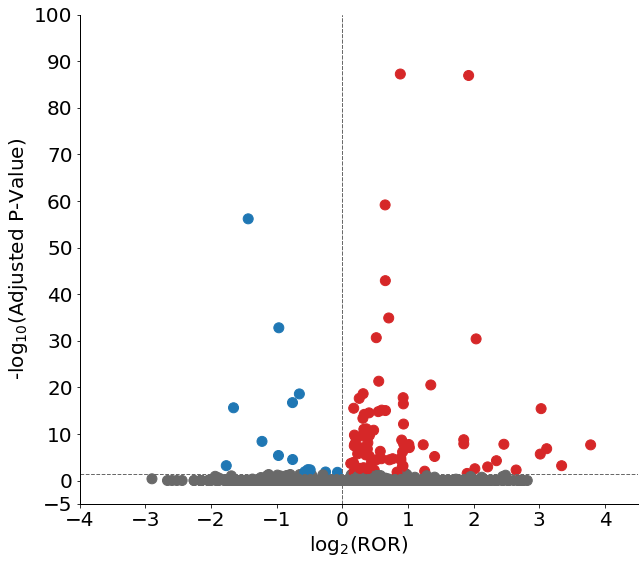

In [11]:
bwith = 1
pd_df = volcano_df
result = pd.DataFrame()
result['x'] = pd_df['logROR']
result['y'] = pd_df['logp']

x_threshold=np.log(1)
y_threshold=-np.log10(0.05)

result.loc[(result.x > x_threshold)&(result.y > y_threshold),'group'] = 'tab:red' 
result.loc[(result.x < -x_threshold)&(result.y > y_threshold),'group'] = 'tab:blue' 
result.loc[result.y < y_threshold,'group'] = 'dimgrey' 

a =4
xmin=-1*a
xmax=4.5
ymin=-5
ymax=100

fig = plt.figure(figsize=(10,9)) 
ax = fig.add_subplot()
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), title='')
ax.scatter(result['x'], result['y'], s=100, c=result['group'])
ax.set_ylabel('-$\mathregular{log_{10}}$(Adjusted P-Value)',fontsize=20)
ax.set_xlabel('$\mathregular{log_2}$(ROR)',fontsize=20)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)

ax.vlines(-x_threshold, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) 
ax.vlines(x_threshold, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) 
ax.hlines(y_threshold, xmin, xmax, color='dimgrey',linestyle='dashed', linewidth=1) 

ax.set_xticks(range(xmin, a+1,1)) 

yt = [-5, 0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ax.set_yticks(yt) 

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    
# fig.savefig('C:/pandemic_figs/volcano_plot_v6.svg',dpi=600,format='svg') 

plt.show()

# Figure 1 panel c
Historical trend of two examples.

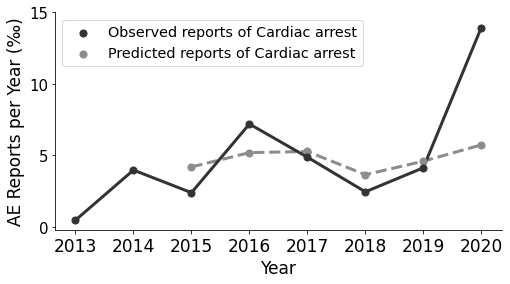

In [12]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

year = [2013,2014,2015,2016,2017,2018,2019, 2020]
Temporal_trend_ob = [524,699, 620, 860,744,623,707,1197]
y2 =  [710, 760,764,683,730,787]
year2 = [2015,2016,2017,2018,2019, 2020]

Predicted = plt.scatter(year2,y2,color='#8c8c8c',zorder=2, s=50)
plt.plot(year2,y2,color='#8c8c8c',zorder=1, linewidth=3, linestyle='dashed')

Truth = plt.scatter(year,Temporal_trend_ob,color='#333333',zorder=2, s=50)
plt.plot(year,Temporal_trend_ob,color='#333333',zorder=1, linewidth=3)

# plt.title("Connected Scatterplot points with line")
plt.xlabel("Year",fontsize=17)
plt.ylabel("AE Reports per Year (‰)",fontsize=17)


plt.xticks(fontsize=17)
plt.yticks([500,750,1000, 1250],[0, 5, 10,15],fontsize=15)
# ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.legend((Truth, Predicted), ('Observed reports of Cardiac arrest', 'Predicted reports of Cardiac arrest'), fontsize='x-large')
# plt.legend()

# fig.savefig('C:/pandemic_figs/trend_keep_black.svg',format='svg',bbox_inches = "tight")
plt.show()

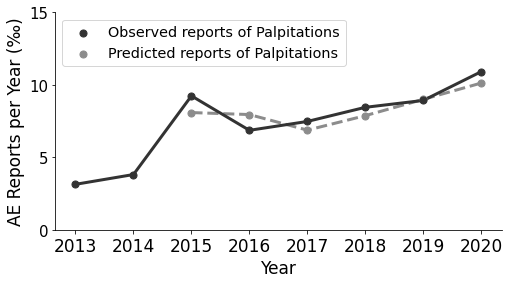

In [13]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

year = [2013,2014,2015,2016,2017,2018,2019, 2020]
Temporal_trend_ob =[451,505,939,749,798,876,914, 1073]

year2 = [2015,2016,2017,2018,2019, 2020]
predicted = [847, 836, 750,830, 920, 1010]


Predicted = plt.scatter(year2,predicted,color='#8c8c8c',zorder=2, s=50)
plt.plot(year2,predicted,color='#8c8c8c',zorder=1, linewidth=3, linestyle='dashed')

Truth = plt.scatter(year,Temporal_trend_ob,color='#333333',zorder=2, s=50)
plt.plot(year,Temporal_trend_ob,color='#333333',zorder=1, linewidth=3)

# plt.title("Connected Scatterplot points with line")
plt.xlabel("Year",fontsize=17)
plt.ylabel("AE Reports per Year (‰)",fontsize=17)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.yticks([200,600,1000, 1400],[0, 5, 10,15],fontsize=15)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.legend((Truth, Predicted), ('Observed reports of Palpitations', 'Predicted reports of Palpitations'), fontsize='x-large', loc='upper left' )
# plt.legend()
plt.ylim([200,1400])


# fig.savefig('C:/pandemic_figs/trend_drop_black.svg',format='svg',bbox_inches = "tight")
plt.show()

# Figure 1 panel e, f

Panel e and f are using the same source data.  We split the figure into two panels: The first three columns show dataflow pre-pandemic and the last three columns show dataflow during pandemic, while the middle column (age groups) is shared.

We manually changed some colors in Adobe Illustrator.

In [14]:
Source_last = ['10013578', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10013578', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10016803', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10016803', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10017577', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10017577', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10020772', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10020772', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10021097', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10021097', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10021143', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10021143', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10022437', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10022437', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10027145', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10027145', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10033425', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10033425', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10033433', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10033433', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10035664', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10035664', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10037400', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10037400', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10037660', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10037660', 'women_nonpan', 'women_nonpan', 'women_nonpan', '10046571', 'men_nonpan', 'men_nonpan', 'men_nonpan', '10046571', 'women_nonpan', 'women_nonpan', 'women_nonpan', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly', 'men_pan', 'young', 'adult', 'elderly', 'women_pan', 'young', 'adult', 'elderly']

Target_last = ['men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', 'men_nonpan', 'young', 'adult', 'elderly', 'women_nonpan', 'young', 'adult', 'elderly', '10013578_', 'men_pan', 'men_pan', 'men_pan', '10013578_', 'women_pan', 'women_pan', 'women_pan', '10016803_', 'men_pan', 'men_pan', 'men_pan', '10016803_', 'women_pan', 'women_pan', 'women_pan', '10017577_', 'men_pan', 'men_pan', 'men_pan', '10017577_', 'women_pan', 'women_pan', 'women_pan', '10020772_', 'men_pan', 'men_pan', 'men_pan', '10020772_', 'women_pan', 'women_pan', 'women_pan', '10021097_', 'men_pan', 'men_pan', 'men_pan', '10021097_', 'women_pan', 'women_pan', 'women_pan', '10021143_', 'men_pan', 'men_pan', 'men_pan', '10021143_', 'women_pan', 'women_pan', 'women_pan', '10022437_', 'men_pan', 'men_pan', 'men_pan', '10022437_', 'women_pan', 'women_pan', 'women_pan', '10027145_', 'men_pan', 'men_pan', 'men_pan', '10027145_', 'women_pan', 'women_pan', 'women_pan', '10033425_', 'men_pan', 'men_pan', 'men_pan', '10033425_', 'women_pan', 'women_pan', 'women_pan', '10033433_', 'men_pan', 'men_pan', 'men_pan', '10033433_', 'women_pan', 'women_pan', 'women_pan', '10035664_', 'men_pan', 'men_pan', 'men_pan', '10035664_', 'women_pan', 'women_pan', 'women_pan', '10037400_', 'men_pan', 'men_pan', 'men_pan', '10037400_', 'women_pan', 'women_pan', 'women_pan', '10037660_', 'men_pan', 'men_pan', 'men_pan', '10037660_', 'women_pan', 'women_pan', 'women_pan', '10046571_', 'men_pan', 'men_pan', 'men_pan', '10046571_', 'women_pan', 'women_pan', 'women_pan']

Values_last = [47, 0, 13, 14, 48, 0, 16, 16, 145, 8, 60, 47, 216, 3, 107, 69, 454, 7, 143, 171, 819, 9, 303, 296, 471, 30, 152, 124, 739, 33, 245, 229, 936, 54, 282, 345, 1119, 86, 434, 362, 234, 29, 87, 87, 300, 16, 138, 95, 666, 14, 272, 163, 1138, 17, 507, 302, 15, 0, 12, 1, 40, 1, 25, 8, 698, 29, 254, 197, 1787, 27, 782, 526, 128, 5, 50, 38, 419, 5, 206, 113, 1597, 51, 434, 609, 1927, 52, 654, 688, 104, 11, 23, 42, 231, 11, 89, 77, 1112, 125, 438, 299, 1352, 111, 622, 311, 380, 4, 107, 175, 1257, 19, 448, 444, 70, 2, 24, 36, 114, 1, 54, 35, 155, 6, 84, 47, 326, 2, 167, 110, 570, 10, 184, 213, 1054, 7, 390, 379, 527, 46, 153, 160, 946, 28, 378, 246, 1007, 50, 413, 407, 1362, 72, 602, 452, 324, 49, 119, 121, 438, 34, 199, 157, 718, 29, 273, 175, 1322, 19, 556, 371, 26, 0, 19, 4, 119, 0, 101, 7, 760, 22, 288, 228, 2088, 26, 914, 598, 200, 3, 85, 52, 715, 2, 355, 155, 1435, 37, 387, 537, 2354, 51, 801, 780, 151, 6, 48, 55, 386, 13, 166, 139, 1144, 152, 452, 295, 1702, 151, 773, 341, 442, 6, 105, 205, 1665, 19, 546, 597]

In [15]:
Node_label_last = ['10013578', '10016803', '10017577', '10020772', '10021097', '10021143', '10022437', '10027145', '10033425', '10033433', '10035664', '10037400', '10037660', '10046571', 'men_nonpan', 'women_nonpan', 'young', 'adult', 'elderly', 'men_pan', 'women_pan', '10013578_', '10016803_', '10017577_', '10020772_', '10021097_', '10021143_', '10022437_', '10027145_', '10033425_', '10033433_', '10035664_', '10037400_', '10037660_', '10046571_']
node_dict_last = {y:x for x, y in enumerate(Node_label_last)}
len(node_dict_last)

35

In [25]:
Node_label_last_jiazi = ['Dizziness postural', 'Fluid overload', 'Gait disturbance', 'Hypertension', 'Hypotension', 'Hypoxia', 'Insomnia', 'Melanocytic naevus', 'Pain in extremity', 'Pain in jaw', 'Pneumonia', 'Pulmonary hypertension', 'Pyrexia', 'Urinary tract infection', 'Men', 'Women', 'Young', 'Adult', 'Elderly', 'men_pan', 'women_pan','10013578_', '10016803_', '10017577_', '10020772_', '10021097_', '10021143_', '10022437_', '10027145_', '10033425_', '10033433_', '10035664_', '10037400_', '10037660_', '10046571_']
node_color_last = ['#F85443', '#C5CAFB', '#00D3F0', '#5D6DF5', '#5D6DF5', '#FF96FC', '#F85443', '#FDA79B', '#00D3F0', '#00D3F0', '#00CC98', '#5D6DF5', '#00FFCB', '#00CC98',
                  '#3498DB','#E74C3C', '#F7E377', '#9999FF','#CC99CC', '#3498DB','#E74C3C',
                  '#F85443', '#C5CAFB', '#00D3F0', '#5D6DF5', '#5D6DF5', '#FF96FC', '#F85443', '#FDA79B', '#00D3F0', '#00D3F0', '#00CC98', '#5D6DF5', '#00FFCB', '#00CC98']

In [17]:
source_node_last = [node_dict_last[x] for x in Source_last]
target_node_last = [node_dict_last[x] for x in Target_last]

In [18]:
pd_save = pd.DataFrame({'Source':Source_last, 'Target': Target_last, 'Value':Values_last, 
                       })
# pd_save.to_csv('source_data_fig1_panel_e.csv')

In [19]:
node_label_color_last = {x:y for x, y in zip(Node_label_last, node_color_last)}
my_link_color_nonpan_last = [node_label_color_last[x] for x in Source_last[:int(len(Source_last)/2)]]

my_link_color_nonpan_last = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in my_link_color_nonpan_last] 

my_link_color_pan_last = [node_label_color_last[x] for x in Target_last[int(len(Source_last)/2):]]

my_link_color_pan_last = ['rgba({},{},{}, 0.4)'.format(
    hex_to_rgb(x)[0],
    hex_to_rgb(x)[1],
    hex_to_rgb(x)[2]) for x in my_link_color_pan_last] 

my_link_color_last = my_link_color_nonpan_last
my_link_color_last.extend(my_link_color_pan_last)

In [26]:
fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = Node_label_last_jiazi,
            color = node_color_last,
            pad = 5
        ),
        # This part is for the link information
        link = dict(
            source = source_node_last,
            target = target_node_last,
            value = Values_last,
            color = my_link_color_last
        ))])

# With this save the plots 
# plot(fig,
#      image_filename='sankey_final_nonpan_newcolor', 
#      image='svg', 
#      image_width=1000, 
#      image_height=500
# )

# And shows the plot
fig.show()

In [21]:
# the labels of other part
Node_label_last_jiazi2 = ['10013578', '10016803', '10017577', '10020772', '10021097', '10021143', '10022437', '10027145', '10033425', '10033433', '10035664', '10037400', '10037660', '10046571', 'men_nonpan', 'women_nonpan', 'Young', 'Adult', 'Elderly', 'Men', 'Women', 'Dizziness postural', 'Fluid overload', 'Gait disturbance', 'Hypertension', 'Hypotension', 'Hypoxia', 'Insomnia', 'Melanocytic naevus', 'Pain in extremity', 'Pain in jaw', 'Pneumonia', 'Pulmonary hypertension', 'Pyrexia', 'Urinary tract infection']

In [23]:
# other part of the diagram in the same direction

node_color_last = ['#F85443', '#C5CAFB', '#00D3F0', '#5D6DF5', '#5D6DF5', '#FF96FC', '#F85443', '#FDA79B', '#00D3F0', '#00D3F0', '#00CC98', '#5D6DF5', '#00FFCB', '#00CC98',
                   '#3498DB','#E74C3C', '#F7E377', '#9999FF','#CC99CC', '#3498DB','#E74C3C',
                  '#F85443', '#C5CAFB', '#00D3F0', '#5D6DF5', '#5D6DF5', '#FF96FC', '#F85443', '#FDA79B', '#00D3F0', '#00D3F0', '#00CC98', '#5D6DF5', '#00FFCB', '#00CC98']

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = Node_label_last_jiazi2,
            color = node_color_last,
            pad = 5
        ),
        # This part is for the link information
        link = dict(
            source = target_node_last,
            target = source_node_last,
            value = Values_last,
            color = my_link_color_last
        ))])

# With this save the plots 
# plot(fig,
#      image_filename='sankey_final_pan_newcolor', 
#      image='svg', 
#      image_width=1000, 
#      image_height=500
# )

# And shows the plot
fig.show()

# Figure 2 panel a

All the source data/numbers to draw panel a can be clearly seen in Fig 2 in the main paper.

# Figure 2 panel b 

In [28]:
ratio_pd_all = pickle.load(open('./figuredata/pd_ratio.pk','rb'))

# ratio_pd_all = ratio_pd.sort_values('ratio_2020',ascending=False)
ratio_pd_all['ratio_2019'] = ratio_pd_all['ratio_2019']*100
ratio_pd_all['ratio_2020'] = ratio_pd_all['ratio_2020']*100
ratio_pd_all['difference'] = ratio_pd_all['difference']*100
ratio_pd_all['errorbar_2020'] = ratio_pd_all['errorbar_2020']*100
ratio_pd_all['errorbar_2019'] = ratio_pd_all['errorbar_2019']*100
ratio_pd_all = ratio_pd_all.sort_values('difference', ascending=False)

ratio_pd_all=ratio_pd_all.iloc[::-1]

ratio_pd_all.iloc[0]

name             Hypogammaglobulinaemia
ratio_2020                         41.2
errorbar_2020                   2.66657
ratio_2019                         70.6
errorbar_2019                   8.86188
difference                        -29.4
Name: 22, dtype: object

In [29]:
# ratio_pd_all.to_csv('source_data_fig2_panel_b.csv')

In [30]:
ratio_pd_all.shape

(53, 6)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


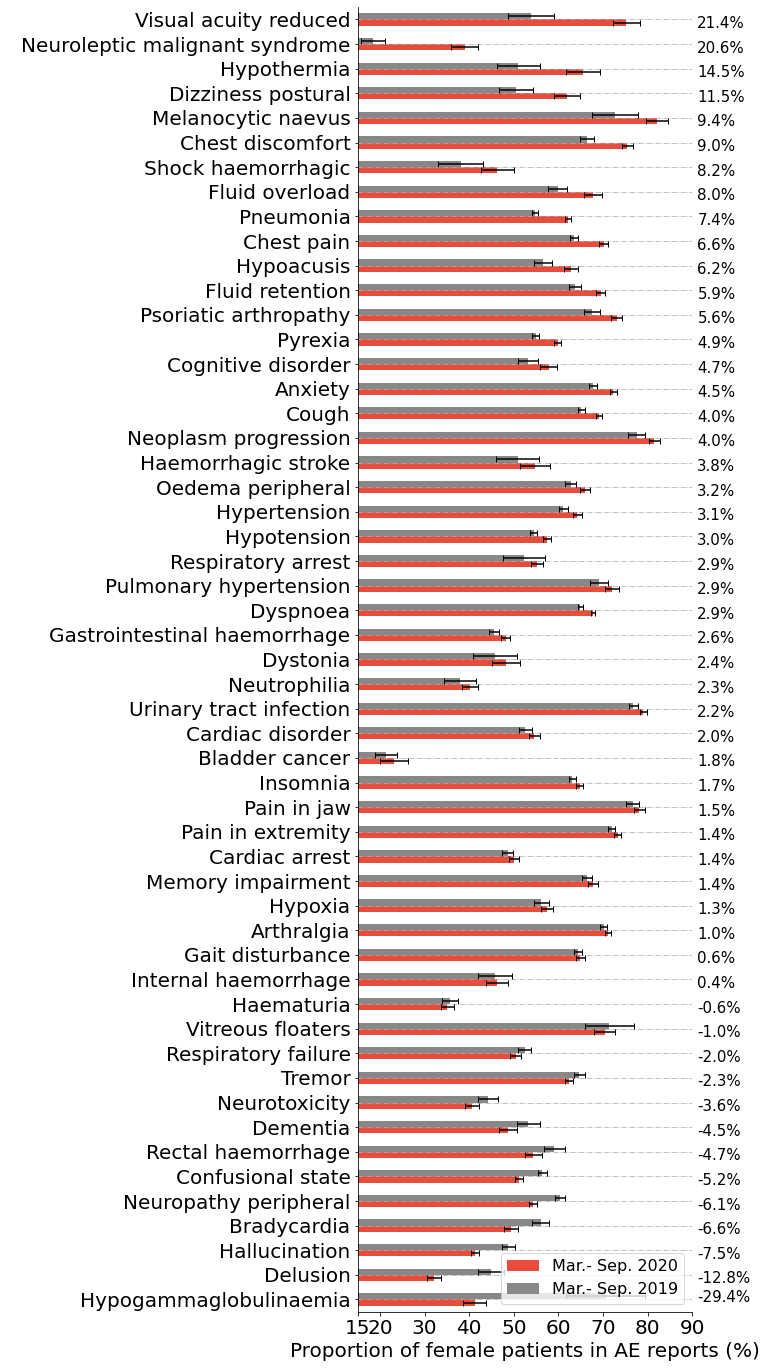

In [31]:
xerr_2020 = list(ratio_pd_all['errorbar_2020'])
xerr_2019 = list(ratio_pd_all['errorbar_2019'])

ax = ratio_pd_all.plot(x='name', y=['ratio_2020','ratio_2019'], kind='barh', figsize=(6,24), color=['#E74C3C','#888888'],
                       xerr=[xerr_2020, xerr_2019],  capsize=3, rot=0)

difference = list(ratio_pd_all.difference)

i=0
for p in ax.patches:
    if i==0:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
        ax.annotate("%.1f" % difference[i]+'%', ( 90, p.get_y()-0.25), xytext=(5, 10), 
                    textcoords='offset points',fontsize=15 )        
    elif i <53:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
        ax.annotate("%.1f" % difference[i]+'%', ( 90, p.get_y()-0.5), xytext=(5, 10), 
                    textcoords='offset points',fontsize=15 )  
    i+=1
plt.xticks([15,20,30,40,50,60,70,80, 90], fontsize=20)
plt.yticks(fontsize=20,fontname='Arial')
plt.xlabel('Proportion of female patients in AE reports (%)', fontsize=20)
plt.ylabel(' ')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.legend(["Mar.- Sep. 2020", "Mar.- Sep. 2019"], fontsize=16)
plt.xlim([15,90])
plt.grid(axis="y", linestyle='-.')
# plt.savefig('C:/pandemic_figs/male_ratio_bar2020_difference.svg',format='svg',bbox_inches = "tight")
plt.show()

# Figure 3 panel a

In [50]:
dif_gender_bar = pickle.load(open('./figuredata/diff_bar_gender.pk','rb'))
dif_gender_bar = dif_gender_bar.replace('immune effector cell-associated neurotoxicity syndrome', 'IEC-associated neurotoxicity syndrome')
dif_gender_bar = dif_gender_bar.replace('epstein-barr virus infection reactivation', 'EBV infection reactivation')
dif_gender_bar = dif_gender_bar.loc[dif_gender_bar['AE_name'] != 'Premature delivery']
dif_gender_bar = dif_gender_bar.replace('General physical health deterioration', 'GPHD')
dif_gender_bar = dif_gender_bar.replace('Pulmonary arterial hypertension', 'PAH')
dif_gender_bar = dif_gender_bar.replace('Gastrointestinal haemorrhage', 'GI haemorrhage')
# dif_gender_bar = dif_gender_bar.replace('Hypogammaglobulinaemia', 'HGG')
# dif_gender_bar = dif_gender_bar.replace('Neuroleptic malignant syndrome', 'NMS')

In [48]:
dif_gender_bar.head(3)

,AE_name,men,women
8,HGG,1.907,0.0
0,Alcoholism,1.792,0.0
7,Delusion,1.594,0.0


In [41]:
# dif_gender_bar.to_csv('source_data_fig3_panel_a.csv')

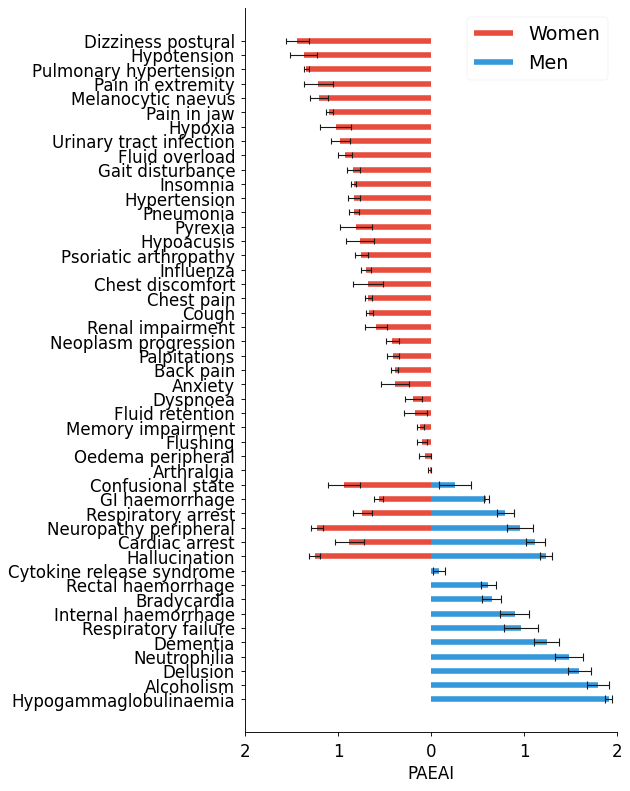

In [51]:
fig, ax = plt.subplots(figsize=(6,12), dpi= 80)

dif_gender_bar['women'] = [-i for i in dif_gender_bar.women]
dif_gender_bar['colors_men'] = ['#3498DB' for x in dif_gender_bar.men]

dif_gender_bar['colors_women'] = ['#E74C3C' for x in dif_gender_bar.women]
women = plt.hlines(y=dif_gender_bar.AE_name, xmin=0, xmax=dif_gender_bar.women, color=dif_gender_bar.colors_women, alpha=1, linewidth=5)

men = plt.hlines(y=dif_gender_bar.AE_name, xmin=0, xmax=dif_gender_bar.men, color=dif_gender_bar.colors_men, alpha=1, linewidth=5)

# error bar
dy_women = [0.06228045, 0.15730875, 0.0652137 , 0.10239524, 0.05169296,
       0.17165349, 0.0141127, 0.0678909 , 0.0531749 , 0.03868109,
       0.12210655, 0.09480719, 0.1481982 , 0.03923195, 0.06796281,
       0.06984061, 0.11579235, 0.03712874, 0.03982565, 0.16165491,
       0.05584684, 0.07214078, 0.15567271, 0.17432813, 0.05354552,
       0.06520427, 0.02706582, 0.0720474 , 0.07643049, 0.09967127,
       0.1674852 , 0.03965591, 0.09568835, 0.1565463 , 0.0254081 ,
       0.14641946, 0.12431619]
dy_men = [0.03479995, 0.120418  , 0.12287144, 0.15056129, 0.13600015,
       0.18260604, 0.15778776, 0.10192515, 0.08221285, 0.06251957,
       0.06255104, 0.10192039, 0.14107399, 0.08945591, 0.03202121,
       0.17049573]
plt.errorbar(dif_gender_bar.women[10:],dif_gender_bar.AE_name[10:],xerr=dy_women,fmt='none', ecolor='#1a1a1a',elinewidth=1,capsize=3,capthick=1)
plt.errorbar(dif_gender_bar.men[:16],dif_gender_bar.AE_name[:16],xerr=dy_men,fmt='none',ecolor='#1a1a1a',elinewidth=1,capsize=4,capthick=1)


# Decorations
plt.xlabel('PAEAI',  fontsize=15)
plt.xlim([-2,2])
plt.xticks(ticks=[-2,-1,0,1,2], labels=[2,1,0,1,2])
plt.yticks(fontsize=15, fontname='Arial')
plt.xticks(fontsize=15)

plt.legend((women, men), ('Women', 'Men'), fontsize='xx-large')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# plt.savefig('C:/pandemic_figs/diff_bar_gender_1215.svg',bbox_inches = "tight")  #,transparent=True)
plt.show()

# Figure 3 panel b

In [52]:
dif_age_bar = pickle.load(open('./figuredata/diff_bar_age.pk','rb'))
dif_age_bar = dif_age_bar.iloc[::-1]

In [53]:
dif_age_bar = dif_age_bar.replace('immune effector cell-associated neurotoxicity syndrome', 'IEC-associated neurotoxicity syndrome')
dif_age_bar = dif_age_bar.replace('epstein-barr virus infection reactivation', 'EBV infection reactivation')
dif_age_bar = dif_age_bar.replace('General physical health deterioration', 'GPHD')
dif_age_bar = dif_age_bar.replace('Pulmonary arterial hypertension', 'PAH')
dif_age_bar = dif_age_bar.replace('Gastrointestinal haemorrhage', 'GI haemorrhage')
# dif_age_bar = dif_age_bar.replace('Hypogammaglobulinaemia', 'HGG')
# dif_age_bar = dif_age_bar.replace('Neuroleptic malignant syndrome', 'NMS')

dif_age_bar['young'] = [-i for i in dif_age_bar.young]
dif_age_bar['elderly'] = [-i for i in dif_age_bar.elderly]


dif_age_bar['colors_young'] = ['gold' for x in dif_age_bar.young]
dif_age_bar['colors_adult'] = ['blue' for x in dif_age_bar.adult]
dif_age_bar['colors_elderly'] = ['purple' for x in dif_age_bar.elderly]

In [44]:
# dif_age_bar.to_csv('source_data_fig3_panel_b.csv')

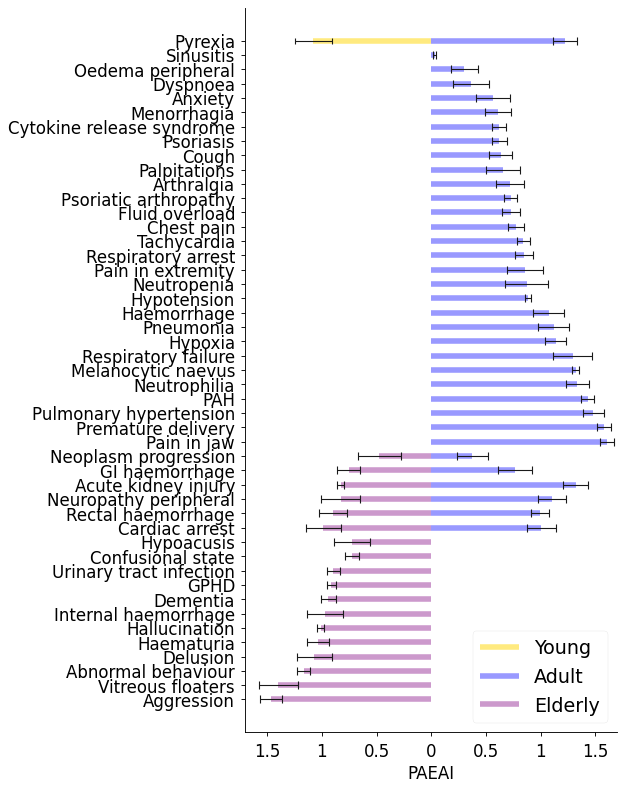

In [54]:
fig, ax = plt.subplots(figsize=(6,12), dpi= 80)

line1 = plt.hlines(y=dif_age_bar.AE_name, xmin=0, xmax=dif_age_bar.young, color=dif_age_bar.colors_young, alpha=0.5, linewidth=5)
line2 = plt.hlines(y=dif_age_bar.AE_name, xmin=0, xmax=dif_age_bar.adult, color=dif_age_bar.colors_adult, alpha=0.4, linewidth=5)
line3 = plt.hlines(y=dif_age_bar.AE_name, xmin=0, xmax=dif_age_bar.elderly, color=dif_age_bar.colors_elderly, alpha=0.4, linewidth=5)

# errorbar

dy_young = [0.166576]
dy_adult = [0.1325555, 0.08354253, 0.12814689, 0.11397855, 0.1529972 ,
       0.14358751, 0.06185584, 0.06397045, 0.09332171, 0.0554309 ,
       0.10743209, 0.03465917, 0.17494523, 0.09576614, 0.14212659,
       0.14300429, 0.02715058, 0.19411864, 0.16510121, 0.08463159,
       0.06070842, 0.07178976, 0.08525307, 0.05929612, 0.12709656,
       0.15689178, 0.10369436, 0.06901197, 0.06644131, 0.11997694,
       0.15264547, 0.16275148, 0.12538374, 0.01317722, 0.11135355]
dy_elderly = [0.10279277, 0.17569378, 0.05827157, 0.1590445 , 0.099415 ,
       0.03347323, 0.16357934, 0.06947786, 0.03753377, 0.05862931,
       0.0632679, 0.16761147, 0.15865928, 0.1299113, 0.18097815,
       0.03366782, 0.10600383, 0.19542851]

plt.errorbar(dif_age_bar.young[-1:],dif_age_bar.AE_name[-1:],xerr=dy_young,fmt='none', ecolor='#1a1a1a',elinewidth=1,capsize=3,capthick=1)
plt.errorbar(dif_age_bar.adult[-35:],dif_age_bar.AE_name[-35:],xerr=dy_adult,fmt='none',ecolor='#1a1a1a',elinewidth=1,capsize=4,capthick=1)
plt.errorbar(dif_age_bar.elderly[:18],dif_age_bar.AE_name[:18],xerr=dy_elderly,fmt='none',ecolor='#1a1a1a',elinewidth=1,capsize=4,capthick=1)

# Decorations
plt.xlabel('PAEAI',  fontsize=15)
plt.legend((line1, line2, line3), ('Young', 'Adult', 'Elderly'), fontsize='xx-large')

plt.xticks(ticks=[-1.5, -1, -0.5,0,0.5, 1, 1.5, ], labels=[1.5, 1, 0.5,0,0.5, 1, 1.5]) 
plt.yticks(fontsize=15, fontname='Arial')
plt.xticks(fontsize=15)
plt.xlim([-1.7,1.7])

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# plt.savefig('C:/pandemic_figs/diff_age_bar_v10.svg',bbox_inches = "tight")  #,transparent=True)
plt.show()

# Figure 3 panel c

In [32]:
short_name_all = pickle.load(open('./figuredata/all_pandemic.pk','rb'))
short_name_all.shape

(54, 3)

In [33]:
short_name_all.head(5)

,AE,Women,men
0,Anxiety,1415,541
1,Arthralgia,2424,983
2,Bladder cancer,12,40
3,Bradycardia,266,272
4,Cardiac arrest,631,631


In [34]:
# short_name_all.to_csv('source_data_fig2_panel_c_duringpandemic.csv')

# short_name_all = pickle.load(open('./all_nonpandemic.pk','rb'))
# short_name_all.to_csv('source_data_fig2_panel_c_beforepandemic.csv')

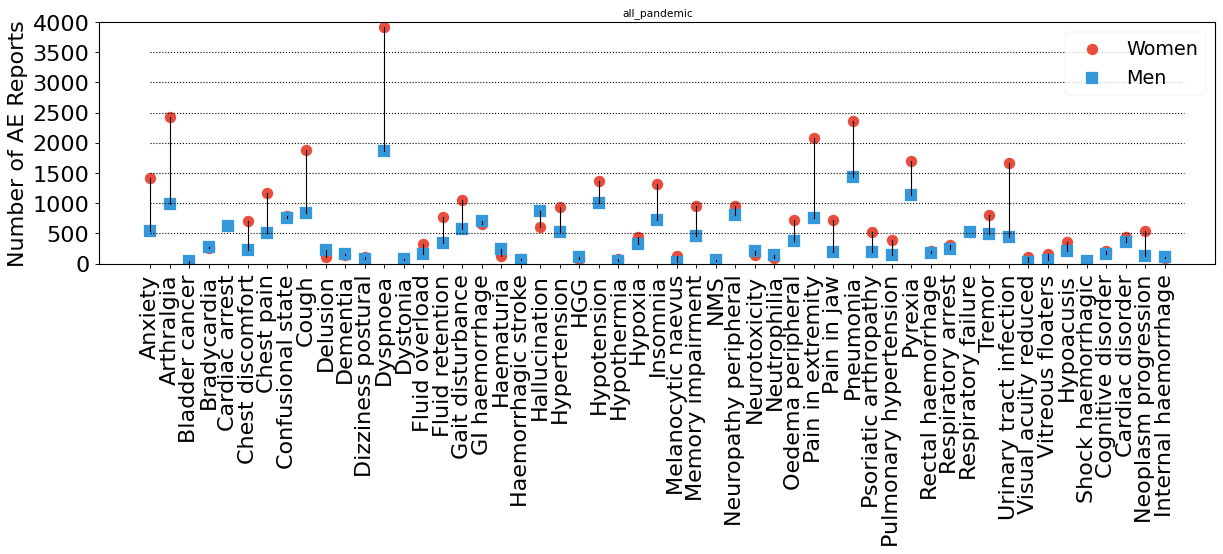

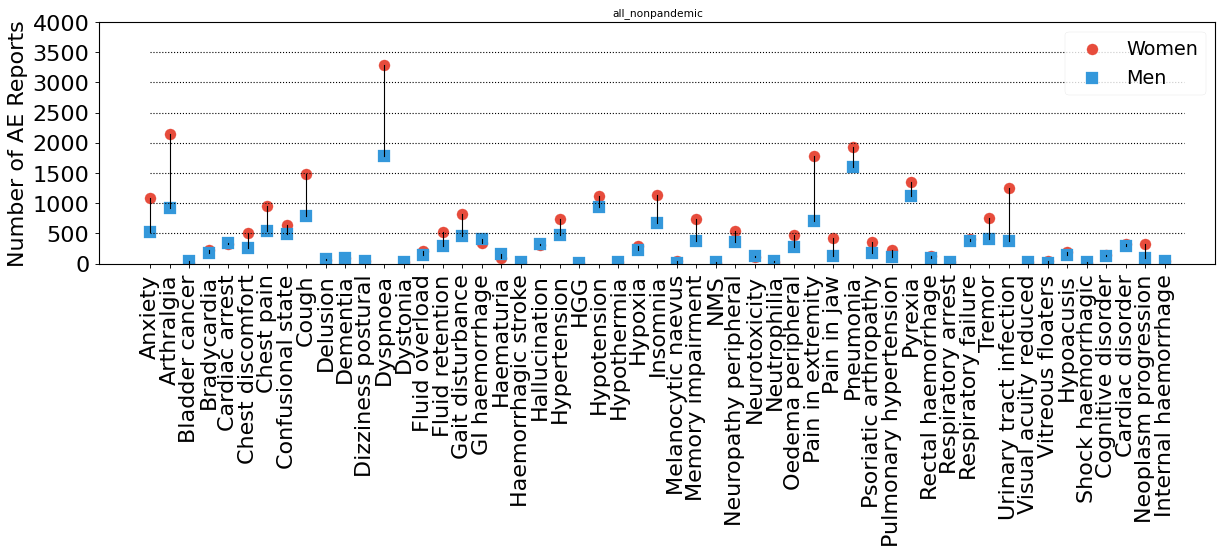

In [37]:
plt.style.use('seaborn-paper')

con_list = ['all_pandemic','all_nonpandemic']

for con in con_list:
    # Import Data
    df = pickle.load(open('./figuredata/'+con+'.pk','rb'))
#     df = df.replace('immune effector cell-associated neurotoxicity syndrome', 'IEC-associated neurotoxicity syndrome')
#     df = df.replace('epstein-barr virus infection reactivation', 'EBV infection reactivation')
#     df = df.loc[df['AE'] != 'Premature delivery']
    df = df.replace('General physical health deterioration', 'GPHD')
    df = df.replace('Pulmonary arterial hypertension', 'PAH')
    df = df.replace('Gastrointestinal haemorrhage', 'GI haemorrhage')
    df = df.replace('Hypogammaglobulinaemia', 'HGG')
    df = df.replace('Neuroleptic malignant syndrome', 'NMS')
    df = df.loc[df['AE'] != 'Premature delivery']
    
    # Func to draw line segment
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='black', linewidth=1, alpha=1)
        ax.add_line(l)
        return l

    # Figure and Axes
    fig, ax = plt.subplots(1,1,figsize=(18,4), facecolor='#FFFFFF', dpi= 80)

    # Vertical Lines
    lwith = 1
    numberof_ae = 53
    ax.hlines(y=500, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1000, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1500, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=2000, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=2500, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=3000, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=3500, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')

    # Points
    women_scatter = ax.scatter(x=df['AE'], y=df['Women'], s=100, color='#E74C3C', alpha=1)
    men_scatter = ax.scatter(x=df['AE'], y=df['men'], s=100, color='#3498DB', alpha=1, marker='s')

    # Line Segments
    for i, p1, p2 in zip(df['AE'], df['Women'], df['men']):
        newline([i, p1], [i, p2])

    import pylab as pl
    pl.xticks(rotation=90)
    pop = con.split('_')[0]
    
    y_bound = 0
    if pop=='all':
        plt.ylim(y_bound, 4000)
    elif pop=='young':
        plt.ylim(y_bound,120)
    elif pop=='adult':
        plt.ylim(y_bound,1800)
    elif pop=='elderly':
        plt.ylim(y_bound,800)
        
    plt.title(con)
    
    plt.xticks(fontsize=20, fontname='Arial')
    plt.yticks(fontsize=20)
    ax.set_ylabel('Number of AE Reports',fontsize=20)
    
    # Decoration
    bwith = 1
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    plt.legend((women_scatter, men_scatter), ('Women', 'Men'), fontsize='xx-large')

#     plt.savefig('C:/pandemic_figs/gap_'+con+'_final.svg',bbox_inches = "tight")
    plt.show()

# Figure 4 panel a

In [55]:
# short_name_all = pickle.load(open('./adult_pandemic.pk','rb'))
# short_name_all.to_csv('source_data_fig3_panel_c_duringpandemic.csv')

# short_name_all = pickle.load(open('./adult_nonpandemic.pk','rb'))
# short_name_all.to_csv('source_data_fig3_panel_c_beforepandemic.csv')

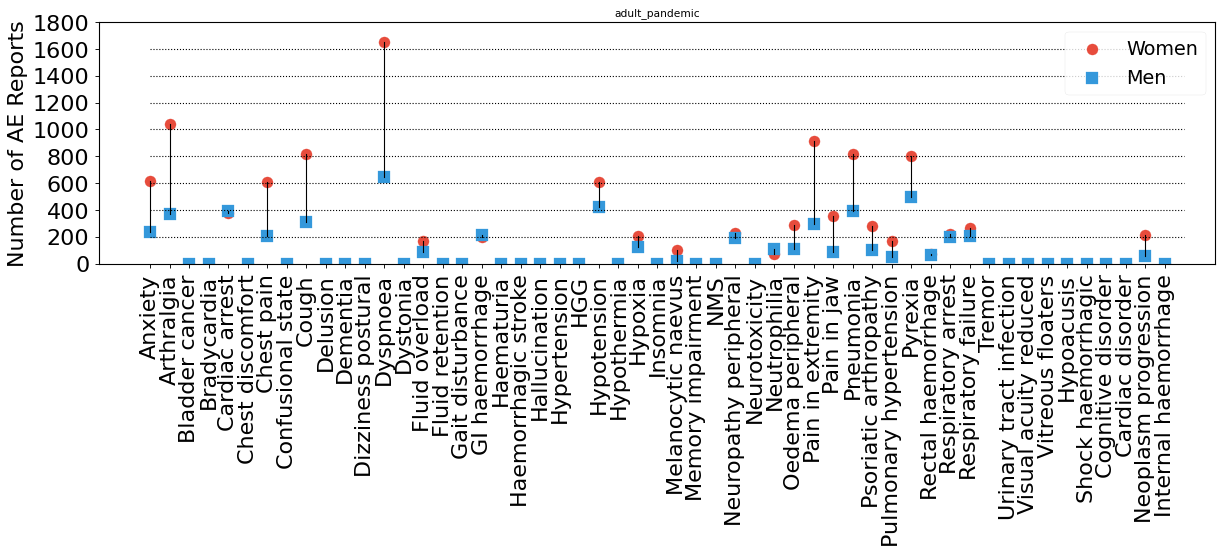

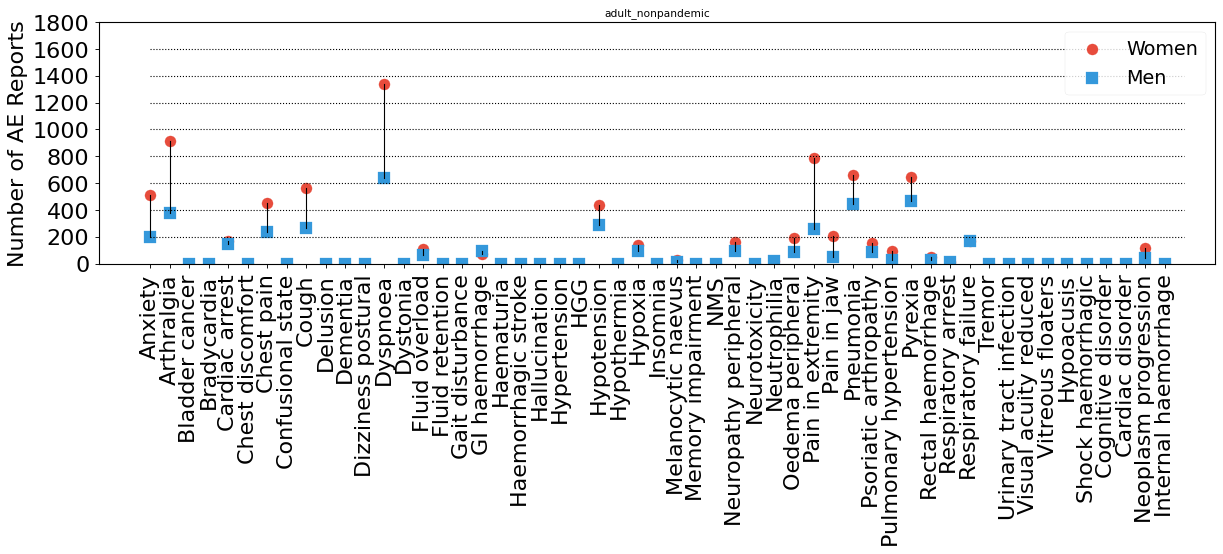

In [57]:
plt.style.use('seaborn-paper')

con_list = ['adult_pandemic','adult_nonpandemic'] 

for con in con_list:
    # Import Data
    df = pickle.load(open('./figuredata/'+con+'.pk','rb'))
#     df = df.replace('immune effector cell-associated neurotoxicity syndrome', 'IEC-associated neurotoxicity syndrome')
#     df = df.replace('epstein-barr virus infection reactivation', 'EBV infection reactivation')
#     df = df.loc[df['AE'] != 'Premature delivery']
    df = df.replace('General physical health deterioration', 'GPHD')
    df = df.replace('Pulmonary arterial hypertension', 'PAH')
    df = df.replace('Gastrointestinal haemorrhage', 'GI haemorrhage')
    df = df.replace('Hypogammaglobulinaemia', 'HGG')
    df = df.replace('Neuroleptic malignant syndrome', 'NMS')
    df = df.loc[df['AE'] != 'Premature delivery']
    
    # Func to draw line segment
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='black', linewidth=1, alpha=1)
        ax.add_line(l)
        return l

    # Figure and Axes
    fig, ax = plt.subplots(1,1,figsize=(18,4), facecolor='#FFFFFF', dpi= 80)

    # Vertical Lines
    lwith = 1
    numberof_ae = 53

    ax.hlines(y=200, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=400, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=600, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=800, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1000, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1200, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1400, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1600, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')


    # Points
    women_scatter = ax.scatter(x=df['AE'], y=df['Women'], s=100, color='#E74C3C', alpha=1)
    men_scatter = ax.scatter(x=df['AE'], y=df['men'], s=100, color='#3498DB', alpha=1, marker='s')


    # Line Segments
    for i, p1, p2 in zip(df['AE'], df['Women'], df['men']):
        newline([i, p1], [i, p2])

    import pylab as pl
    pl.xticks(rotation=90)
    pop = con.split('_')[0]
    
    y_bound = 0
    if pop=='all':
        plt.ylim(y_bound, 4000)
    elif pop=='young':
        plt.ylim(y_bound,120)
    elif pop=='adult':
        plt.ylim(y_bound,1800)
    elif pop=='elderly':
        plt.ylim(y_bound,800)
        
    plt.title(con)
    
    plt.xticks(fontsize=20, fontname='Arial')
    plt.yticks(fontsize=20)
    ax.set_ylabel('Number of AE Reports',fontsize=20)
    
    # Decoration
    bwith = 1
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    plt.legend((women_scatter, men_scatter), ('Women', 'Men'), fontsize='xx-large')

#     plt.savefig('C:/pandemic_figs/gap_'+con+'_final.svg',bbox_inches = "tight")
    plt.show()

# Figure 4 panel b

In [58]:
# short_name_all = pickle.load(open('./elderly_pandemic.pk','rb'))
# short_name_all.to_csv('source_data_fig3_panel_d_duringpandemic.csv')

# short_name_all = pickle.load(open('./elderly_nonpandemic.pk','rb'))
# short_name_all.to_csv('source_data_fig3_panel_d_beforepandemic.csv')

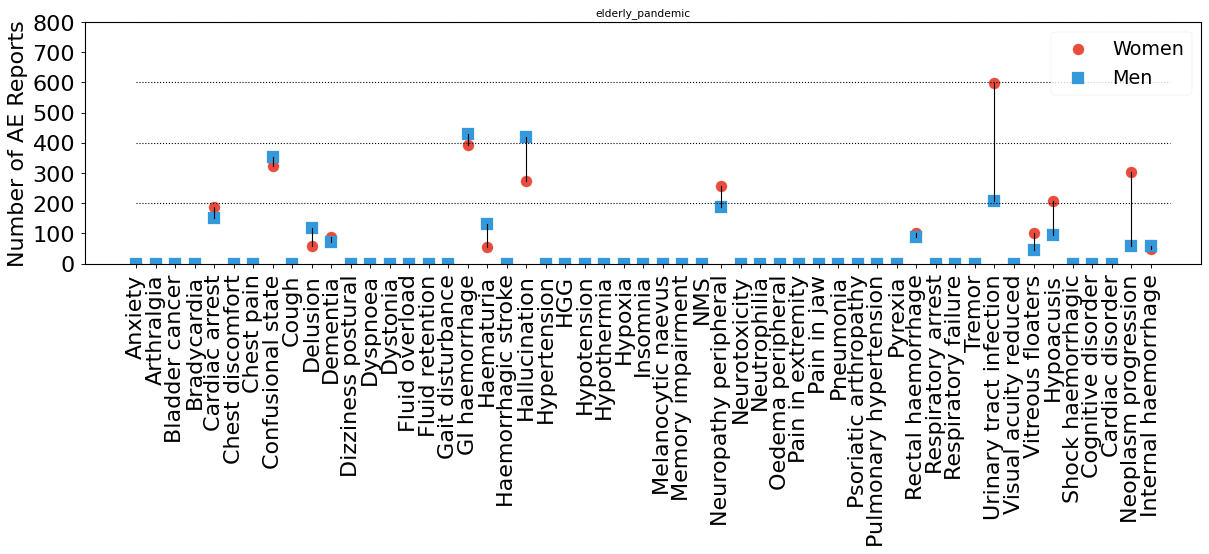

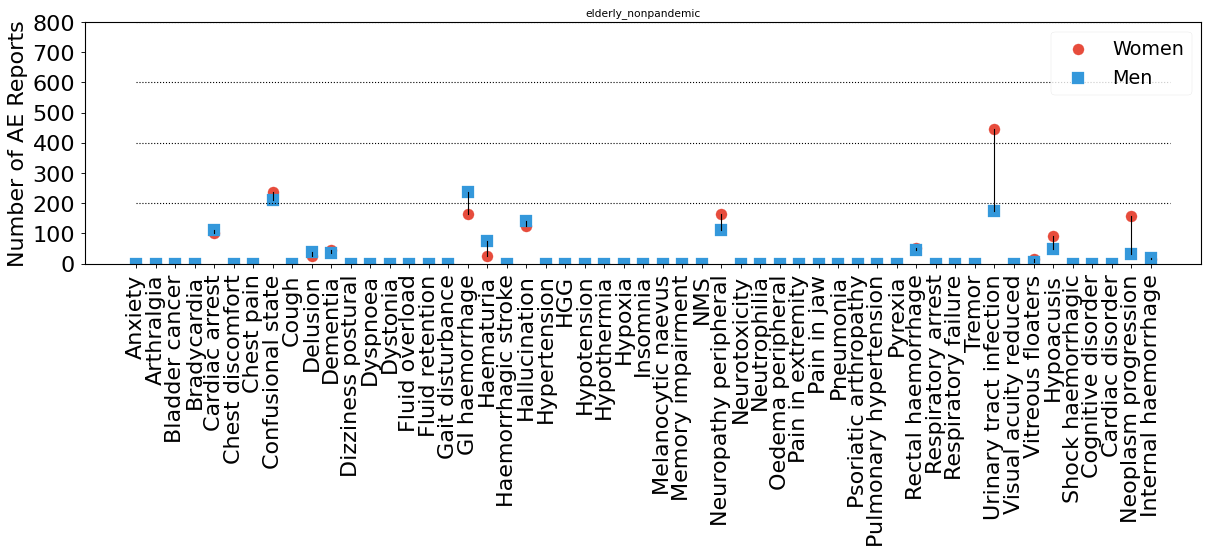

In [60]:
plt.style.use('seaborn-paper')

con_list = ['elderly_pandemic','elderly_nonpandemic']

for con in con_list:
    # Import Data
    df = pickle.load(open('./figuredata/'+con+'.pk','rb'))
#     df = df.replace('immune effector cell-associated neurotoxicity syndrome', 'IEC-associated neurotoxicity syndrome')
#     df = df.replace('epstein-barr virus infection reactivation', 'EBV infection reactivation')
#     df = df.loc[df['AE'] != 'Premature delivery']
    df = df.replace('General physical health deterioration', 'GPHD')
    df = df.replace('Pulmonary arterial hypertension', 'PAH')
    df = df.replace('Gastrointestinal haemorrhage', 'GI haemorrhage')
    df = df.replace('Hypogammaglobulinaemia', 'HGG')
    df = df.replace('Neuroleptic malignant syndrome', 'NMS')
    df = df.loc[df['AE'] != 'Premature delivery']
    
    # Func to draw line segment
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='black', linewidth=1, alpha=1)
        ax.add_line(l)
        return l

    # Figure and Axes
    fig, ax = plt.subplots(1,1,figsize=(18,4), facecolor='#FFFFFF', dpi= 80)

    # Vertical Lines
    lwith = 1
    numberof_ae = 53

    ax.hlines(y=200, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=400, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=600, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=800, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1000, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1200, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1400, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')
    ax.hlines(y=1600, xmin=0, xmax=numberof_ae, color='black', alpha=1, linewidth=lwith, linestyles='dotted')


    # Points
    women_scatter = ax.scatter(x=df['AE'], y=df['Women'], s=100, color='#E74C3C', alpha=1)
    men_scatter = ax.scatter(x=df['AE'], y=df['men'], s=100, color='#3498DB', alpha=1, marker='s')


    # Line Segments
    for i, p1, p2 in zip(df['AE'], df['Women'], df['men']):
        newline([i, p1], [i, p2])

    import pylab as pl
    pl.xticks(rotation=90)
    pop = con.split('_')[0]
    
    y_bound = 0
    if pop=='all':
        plt.ylim(y_bound, 4000)
    elif pop=='young':
        plt.ylim(y_bound,120)
    elif pop=='adult':
        plt.ylim(y_bound,1800)
    elif pop=='elderly':
        plt.ylim(y_bound,800)
        
    plt.title(con)
    
    plt.xticks(fontsize=20, fontname='Arial')
    plt.yticks(fontsize=20)
    ax.set_ylabel('Number of AE Reports',fontsize=20)
    
    # Decoration
    bwith = 1
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    plt.legend((women_scatter, men_scatter), ('Women', 'Men'), fontsize='xx-large')

#     plt.savefig('C:/pandemic_figs/gap_'+con+'_final.svg',bbox_inches = "tight")
    plt.show()

# Figure 5 